# PreProcessing and data interpretation

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x79b25c9857b0>)

In [3]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig = px.histogram(medical_df, x = 'bmi', marginal='box', nbins = 47, title = 'Distribution of age')
fig.update_layout(bargap = 0.3)
fig.show()

In [12]:
fig = px.histogram(medical_df, x ='charges', color = 'region', title = ' Annual medical charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
px.histogram(medical_df, x ='smoker', color = 'sex', title = 'smoker')

In [15]:
fig = px.scatter(medical_df, x = 'age', y= 'charges', color = 'smoker', opacity = 0.8, hover_data = ['sex','region'], title = 'age vs charges')
fig.update_traces(marker_size = 5)
fig.show()

In [16]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [17]:
smoker_value = {'no':0 , 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_value)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [18]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [19]:
medical_df.corr()

<ipython-input-19-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-25-095e5e959568>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



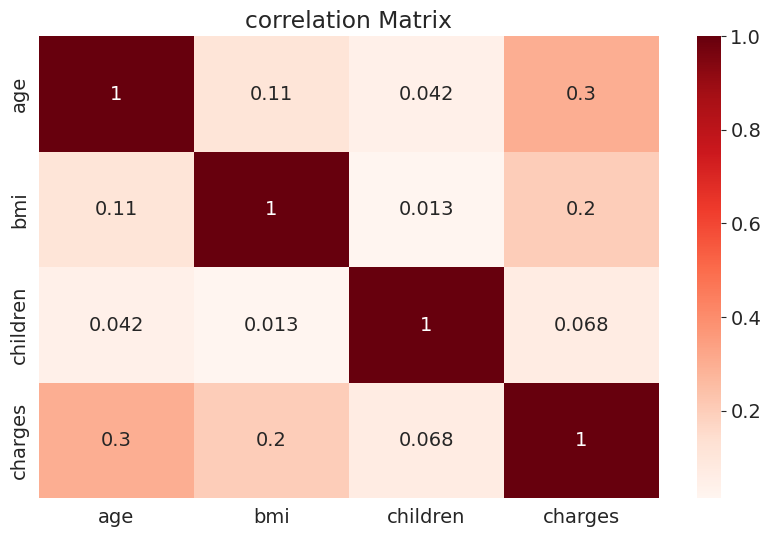

In [25]:
sns.heatmap(medical_df.corr(), cmap = 'Reds', annot = True)
plt.title('correlation Matrix');

# Code for Liner regression with one variable


In [26]:
non_smoker = medical_df[medical_df.smoker == 'no']

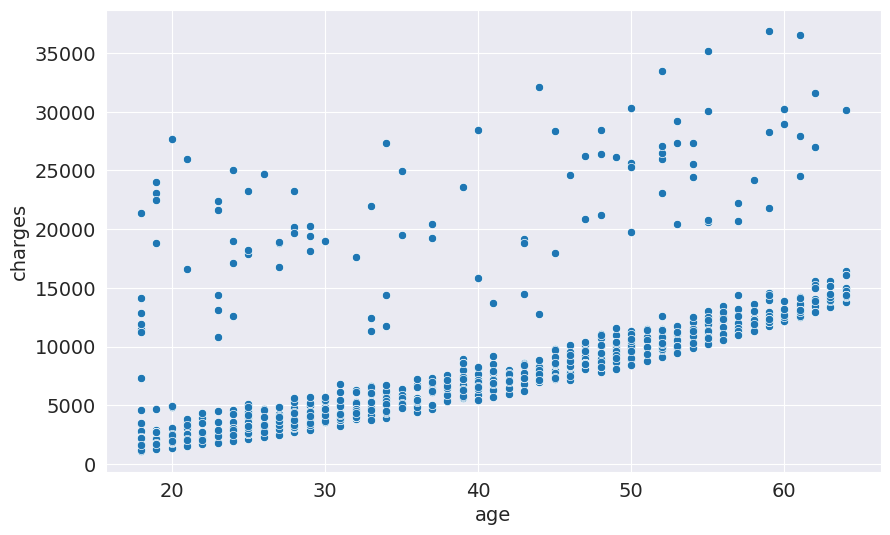

In [28]:
sns.scatterplot(data = non_smoker, x = 'age' , y = 'charges');

Strategy to find the the weights w and b to reduce the loss and improve the fit we can use stochastic gradinet descent or the oridinary least squares method

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
inputs = non_smoker[['age']]
targets = non_smoker.charges

In [34]:
model.fit(inputs,targets)

LinearRegression()

In [35]:
predictions = model.predict(inputs)

In [36]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(targets, predictions)

21738960.023917634

In [46]:
# Create inputs and targets
inputs, targets = non_smoker[['age']], non_smoker.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = mean_squared_error(targets, predictions)
print('Loss:', loss)

Loss: 21738960.023917634


# Linear Regression with multiple variable

In [47]:
input = non_smoker[['age','bmi']]
target = non_smoker.charges

model = LinearRegression().fit(input,target)

prediction = model.predict(input)

mean_squared_error(target, prediction)

21737160.97570714

In [50]:
fig = px.scatter_3d(non_smoker, x = 'age', y = 'bmi', z = 'charges')
fig.update_traces(marker_size = 3, marker_opacity = 0.4)
fig.show()

In [51]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Now we can increase the variable as we want and the only change will be to change the input variable

In [ ]:
smoker_code = {'no':0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)
medical_df

Now with the help of above code we can use categorical data also in our model.

In [56]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

If we have more categories with the same weight we can use the technique called one-hot encoding.

In [58]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [59]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast', 'southwest']] = one_hot
medical_df